# Purpose of this file:
Author: Phuong Huong Nguyen | 29.5.2022
1. Analyzing **submission.csv**:
    - Calculating the average time of combination between userID and itemID
    - Calculating standard deviation(std)
    - The first day and last day of occurence of combination between userID and itemID
- **Note**: **all features** are calculated based on the order file from **01.06.2020 till before 04.01.2021**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime 

# I. Import data

In [5]:
df = pd.read_csv('submission.csv', sep='|').drop(columns=['prediction'])
df

,userID,itemID
0,0,20664
1,0,28231
2,13,2690
3,15,1299
4,15,20968
...,...,...
9995,46118,20106
9996,46124,19677
9997,46125,12878
9998,46127,7963


In [7]:
features = pd.read_csv('3_IU_FEAT_Average_Day.csv', index_col = 0)
features

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,0,1505,0.0,2020-09-01,2020-09-01,93,93
1,0,6446,0.0,2020-12-11,2020-12-11,194,194
2,0,9325,0.0,2020-11-20,2020-11-20,173,173
3,0,12468,0.0,2020-08-03,2020-08-03,64,64
4,0,12505,0.0,2020-08-18,2020-08-18,79,79
...,...,...,...,...,...,...,...
919701,46137,2667,0.0,2020-09-17,2020-09-17,109,109
919702,46137,20209,0.0,2020-08-08,2020-08-08,69,69
919703,46137,28343,0.0,2020-08-08,2020-08-08,69,69
919704,46137,28900,0.0,2020-08-08,2020-08-08,69,69


# II. Merging submission file with features calculated till 04.01.2021

In [8]:
dataset = df.merge(features, how='left', on = ['userID', 'itemID'])
dataset

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,0,20664,94.50,2020-06-05,2020-12-11,5.0,194.0
1,0,28231,21.00,2020-11-20,2020-12-11,173.0,194.0
2,13,2690,67.00,2020-06-06,2020-12-24,6.0,207.0
3,15,1299,54.00,2020-09-09,2020-12-26,101.0,209.0
4,15,20968,39.50,2020-10-08,2020-12-26,130.0,209.0
...,...,...,...,...,...,...,...
9995,46118,20106,42.25,2020-07-07,2020-12-23,37.0,206.0
9996,46124,19677,34.75,2020-08-08,2020-12-25,69.0,208.0
9997,46125,12878,164.00,2020-06-04,2020-11-15,4.0,168.0
9998,46127,7963,40.00,2020-07-07,2020-12-14,37.0,197.0


In [46]:
dataset[dataset['last_day_delta_bought']>= 218]

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userID                  10000 non-null  int64  
 1   itemID                  10000 non-null  int64  
 2   average_cycle_days      9951 non-null   float64
 3   first_date_bought       9951 non-null   object 
 4   last_date_bought        9951 non-null   object 
 5   first_day_delta_bought  9951 non-null   float64
 6   last_day_delta_bought   9951 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 625.0+ KB


- **There are 49 combinations between userID and itemID which happed for the first time after 03.01.2021**

### Extracting all combinations between userID and itemID which occured after 03.01.2021

In [34]:
null_dataset = dataset[dataset.isnull().any(axis=1)]


In [21]:
null_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 228 to 9360
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userID                  49 non-null     int64  
 1   itemID                  49 non-null     int64  
 2   average_cycle_days      0 non-null      float64
 3   first_date_bought       0 non-null      object 
 4   last_date_bought        0 non-null      object 
 5   first_day_delta_bought  0 non-null      float64
 6   last_day_delta_bought   0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.1+ KB


# III. Splitting submission file into 2 dataframes:
- **first_submission**: contain all combinations (userID, itemID) with the last_date_bought before 04.01.2021
- **second_submission**: contain all combinations (userID, itemID) with the first_date_bought from 04.01.2021

In [40]:
first_submission = dataset.dropna(axis=0, how='any')
first_submission

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,0,20664,94.50,2020-06-05,2020-12-11,5.0,194.0
1,0,28231,21.00,2020-11-20,2020-12-11,173.0,194.0
2,13,2690,67.00,2020-06-06,2020-12-24,6.0,207.0
3,15,1299,54.00,2020-09-09,2020-12-26,101.0,209.0
4,15,20968,39.50,2020-10-08,2020-12-26,130.0,209.0
...,...,...,...,...,...,...,...
9995,46118,20106,42.25,2020-07-07,2020-12-23,37.0,206.0
9996,46124,19677,34.75,2020-08-08,2020-12-25,69.0,208.0
9997,46125,12878,164.00,2020-06-04,2020-11-15,4.0,168.0
9998,46127,7963,40.00,2020-07-07,2020-12-14,37.0,197.0


### Calculating features of 49 missing combinations (null_dataset)

In [41]:
feat_4 = pd.read_csv('4_IU_FEAT_Average_Day.csv', index_col = 0)
feat_4

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,0,1505,0.0,2020-09-01,2020-09-01,93,93
1,0,6446,35.0,2020-12-11,2021-01-15,194,229
3,0,9325,0.0,2020-11-20,2020-11-20,173,173
4,0,12468,0.0,2020-08-03,2020-08-03,64,64
5,0,12505,0.0,2020-08-18,2020-08-18,79,79
...,...,...,...,...,...,...,...
1071015,46137,22403,0.0,2021-01-18,2021-01-18,232,232
1071016,46137,22583,0.0,2021-01-31,2021-01-31,245,245
1071017,46137,28343,0.0,2020-08-08,2020-08-08,69,69
1071018,46137,28900,0.0,2020-08-08,2020-08-08,69,69


In [42]:
null_dataset_copy = null_dataset[['userID', 'itemID']].copy()

In [43]:
second_submission = null_dataset_copy.merge(feat_4, how='left', on = ['userID', 'itemID'])
second_submission

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,1189,20694,14.0,2021-01-12,2021-01-26,226,240
1,1287,24973,13.0,2021-01-18,2021-01-31,232,245
2,3099,8018,9.0,2021-01-18,2021-01-27,232,241
3,3520,15661,13.0,2021-01-10,2021-01-23,224,237
4,4304,10967,15.0,2021-01-10,2021-01-25,224,239
5,5278,16369,7.0,2021-01-12,2021-01-19,226,233
6,5278,21483,7.0,2021-01-12,2021-01-19,226,233
7,5699,23512,6.0,2021-01-09,2021-01-15,223,229
8,7109,15479,7.0,2021-01-12,2021-01-19,226,233
9,9269,31354,14.0,2021-01-12,2021-01-26,226,240


In [50]:
first_submission

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,0,20664,94.50,2020-06-05,2020-12-11,5.0,194.0
1,0,28231,21.00,2020-11-20,2020-12-11,173.0,194.0
2,13,2690,67.00,2020-06-06,2020-12-24,6.0,207.0
3,15,1299,54.00,2020-09-09,2020-12-26,101.0,209.0
4,15,20968,39.50,2020-10-08,2020-12-26,130.0,209.0
...,...,...,...,...,...,...,...
9995,46118,20106,42.25,2020-07-07,2020-12-23,37.0,206.0
9996,46124,19677,34.75,2020-08-08,2020-12-25,69.0,208.0
9997,46125,12878,164.00,2020-06-04,2020-11-15,4.0,168.0
9998,46127,7963,40.00,2020-07-07,2020-12-14,37.0,197.0


# IV. Visualizing and Analyzing the distribution of average_cycle_days

C:\Users\dream\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dream\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


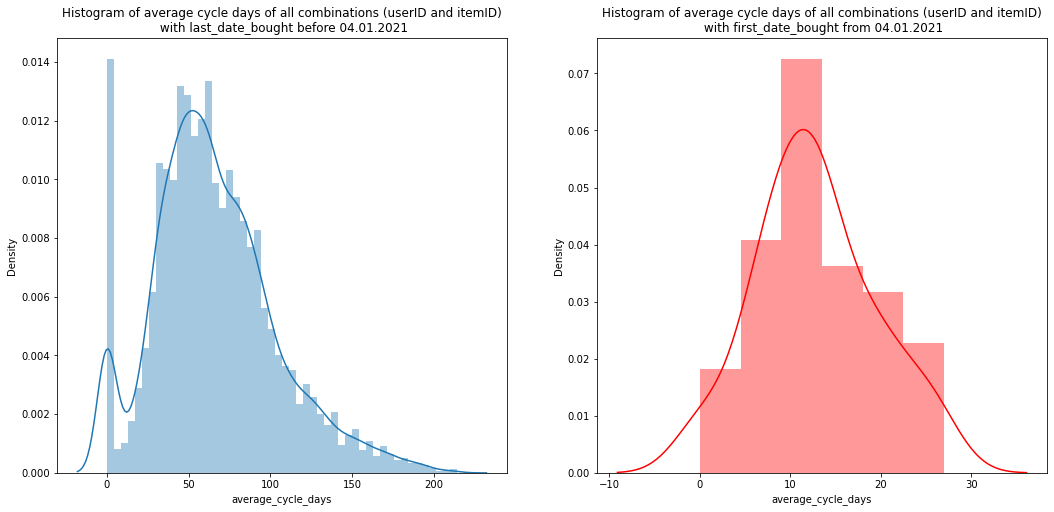

In [69]:
plt.figure(figsize =(10, 8))
plt.subplot(1,2,1)
sns.distplot(first_submission['average_cycle_days'])
plt.title('Histogram of average cycle days of all combinations (userID and itemID)\n with last_date_bought before 04.01.2021')

plt.subplot(1,2,2)
sns.distplot(second_submission['average_cycle_days'], color='red')
plt.title('Histogram of average cycle days of all combinations (userID and itemID)\n with first_date_bought from 04.01.2021')

plt.subplots_adjust(right=1.5)
plt.show()

# V. Merging first_submission and second_submission into one dataframe

In [71]:
sub_features = pd.concat([first_submission, second_submission], ignore_index = True)
sub_features

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,0,20664,94.5,2020-06-05,2020-12-11,5.0,194.0
1,0,28231,21.0,2020-11-20,2020-12-11,173.0,194.0
2,13,2690,67.0,2020-06-06,2020-12-24,6.0,207.0
3,15,1299,54.0,2020-09-09,2020-12-26,101.0,209.0
4,15,20968,39.5,2020-10-08,2020-12-26,130.0,209.0
...,...,...,...,...,...,...,...
9995,40242,11269,4.0,2021-01-08,2021-01-12,222.0,226.0
9996,40631,29657,17.0,2021-01-12,2021-01-29,226.0,243.0
9997,40911,12839,20.0,2021-01-10,2021-01-30,224.0,244.0
9998,41728,30443,25.0,2021-01-05,2021-01-30,219.0,244.0


In [72]:
# Extract dataframe
#sub_features.to_csv('submission_features.csv')